In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
h5f = h5py.File('fer22/data_train_images.h5','r')
train_images = h5f['data_train_images'][:]
h5f.close()

train_images.shape

(540, 10, 300, 200)

In [3]:
h5f = h5py.File('fer22/data_train_landmarks.h5','r')
train_landmarks = h5f['data_train_landmarks'][:]
h5f.close()

train_landmarks.shape

(540, 10, 68, 2)

In [4]:
h5f = h5py.File('fer22/data_train_labels.h5','r')
train_labels = h5f['data_train_labels'][:]
h5f.close()

train_labels.shape

(540,)

Label (sequence : 13) = 4.0 -> disgust


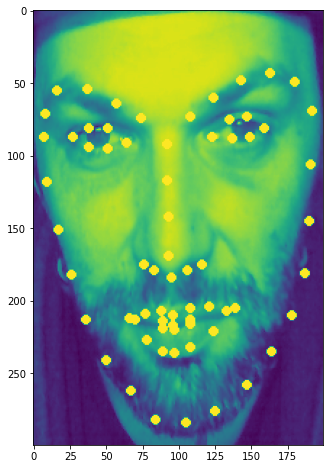

In [5]:
sequence = 13
frame = 4

img = train_images[sequence,frame]
landmarks = train_landmarks[sequence,frame]

expressions = ['happiness','fear','surprise','anger','disgust','sadness']

print("Label (sequence : " + str(sequence) + ") = " + str(train_labels[sequence]) + " -> " + expressions[int(train_labels[sequence])])

for p in landmarks:
    img = cv2.circle(img, (p[0],p[1]), 2, (255,255,255), 2)

plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()

In [6]:
np.bincount(train_labels.astype(int))

array([90, 90, 90, 90, 90, 90])

In [7]:
X = train_landmarks[:,-1,:,:].reshape(540,136)
y = train_labels
X.shape, y.shape

((540, 136), (540,))

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
clf.score(X_train, y_train), clf.score(X_val, y_val)

(1.0, 0.7851851851851852)

In [11]:
h5f = h5py.File('fer22/data_test_landmarks.h5','r')
test_landmarks = h5f['data_test_landmarks'][:]
h5f.close()

X_test = (test_landmarks[:,-1,:,:]).reshape(131,136)
pred = clf.predict(X_test).astype(int)

In [12]:
sample_submission = pd.read_csv("fer22/sampleSubmission.csv")
sample_submission.head()

,Id,expression
0,0,0
1,1,5
2,2,5
3,3,1
4,4,6


In [13]:
sample_submission["expression"] = pred
sample_submission.to_csv("my_first_submission.csv", index=False)